In [1]:
import pandas as pd
data = pd.read_csv("/content/insurance.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [2]:
print("Shape of dataset:", data.shape)
print("\nDataset Info:")
print(data.info())
print("\nSummary Statistics:")
print(data.describe())
print("\nMissing values in dataset:")
print(data.isnull().sum())

Shape of dataset: (1338, 7)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

Summary Statistics:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.03300

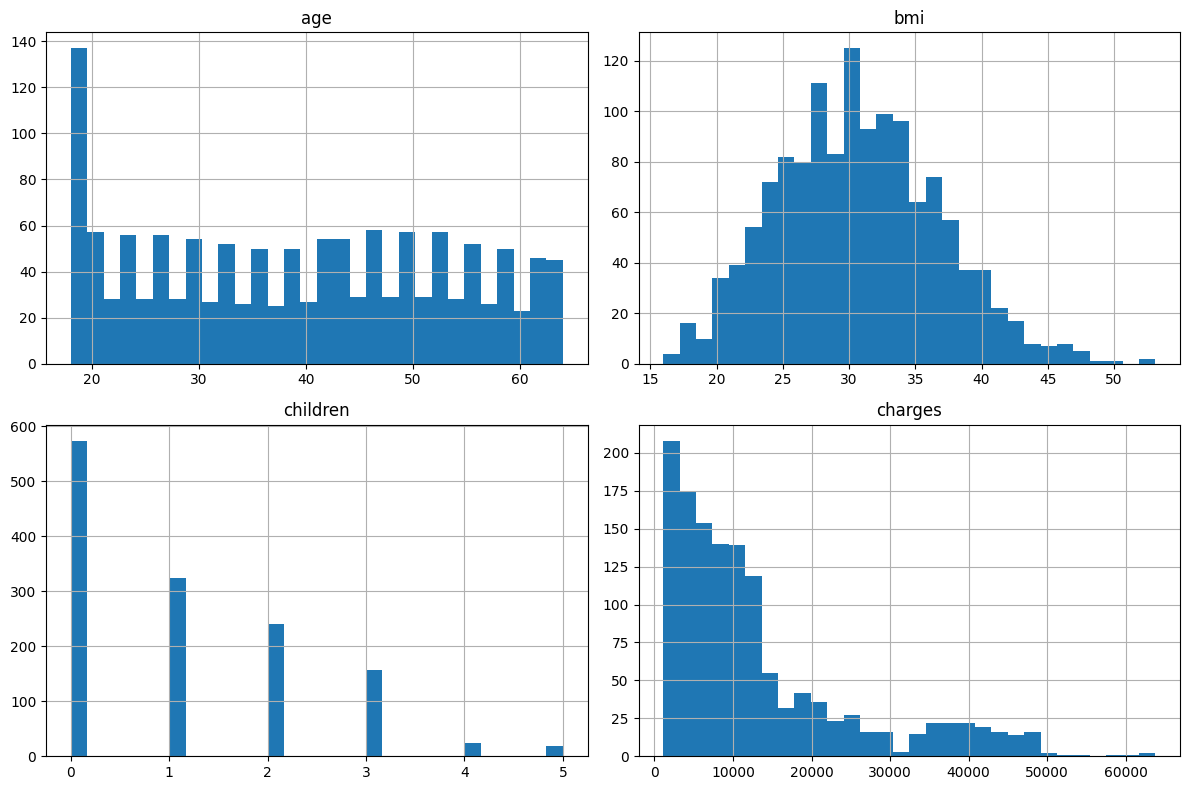

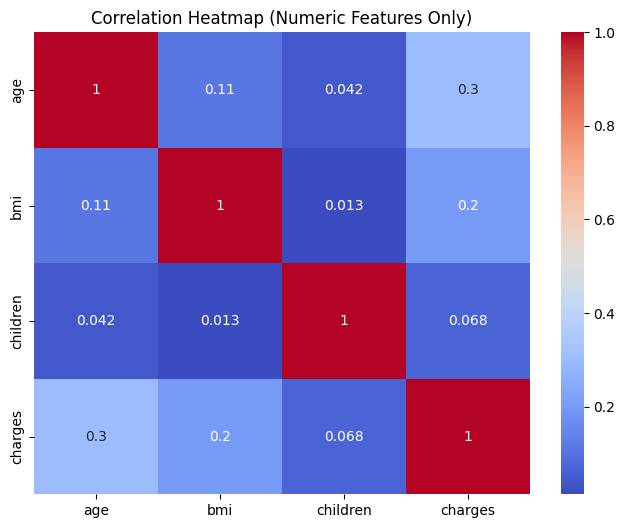

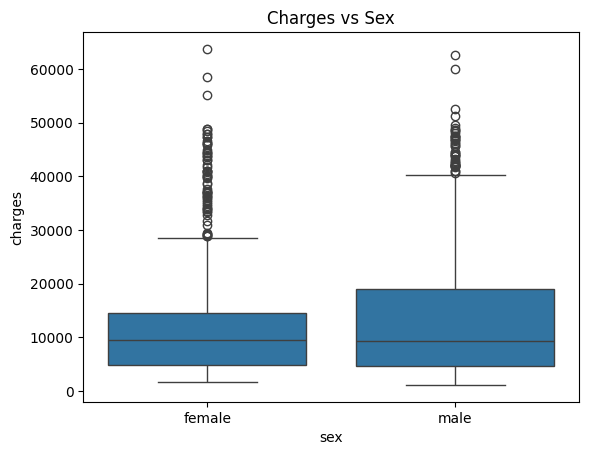

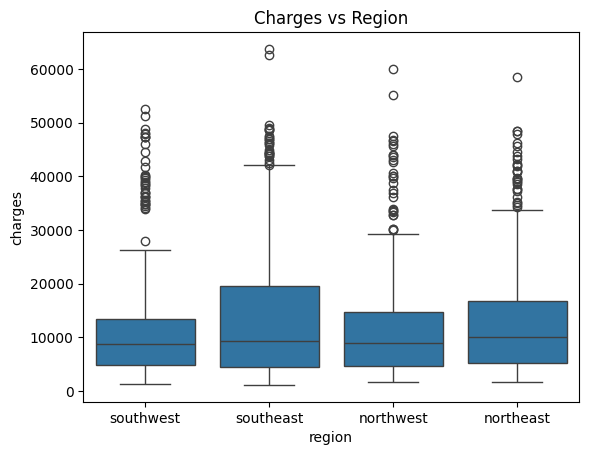

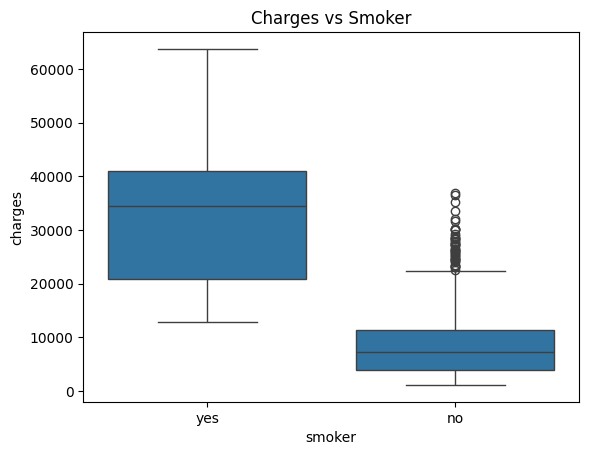

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
data.hist(bins=30, figsize=(12,8))
plt.tight_layout()
plt.show()
plt.figure(figsize=(8,6))
sns.heatmap(data.select_dtypes(include=['int64','float64']).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()
sns.boxplot(x='sex', y='charges', data=data)
plt.title("Charges vs Sex")
plt.show()
sns.boxplot(x='region', y='charges', data=data)
plt.title("Charges vs Region")
plt.show()
sns.boxplot(x='smoker', y='charges', data=data)
plt.title("Charges vs Smoker")
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
X = data.drop("charges", axis=1)
y = data["charges"]
categorical_cols = ['sex', 'smoker', 'region']
numeric_cols = ['age', 'bmi', 'children']
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_cols),
        ("cat", OneHotEncoder(drop="first"), categorical_cols)
    ]
)


In [11]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

model.fit(X_train, y_train)
print("Model Training Completed")


Model Training Completed


In [13]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r2:.4f}")


Mean Squared Error: 33596915.85
Root Mean Squared Error: 5796.28
R-squared: 0.7836


In [14]:
regressor = model.named_steps['regressor']
feature_names = numeric_cols + list(model.named_steps['preprocessor']
                                    .named_transformers_['cat']
                                    .get_feature_names_out(categorical_cols))

coeff_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": regressor.coef_
})

print("\nFeature Importance (Linear Regression Coefficients):")
print(coeff_df.sort_values(by="Coefficient", ascending=False))



Feature Importance (Linear Regression Coefficients):
            Feature   Coefficient
4        smoker_yes  23651.128856
0               age   3614.975415
1               bmi   2036.228123
2          children    516.890247
3          sex_male    -18.591692
5  region_northwest   -370.677326
6  region_southeast   -657.864297
7  region_southwest   -809.799354
